In [19]:
import sys, os

MARIPOSA_PATH = "/home/yizhou7/mariposa/"

sys.path.append(MARIPOSA_PATH + "src")
os.chdir(MARIPOSA_PATH)

from utils.plot_utils import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

benchmarks = ["Mariposa TO", "Mariposa QU", "Verus TO", "Verus QU"]
bench_query_count = np.array([447, 98, 39, 31])
no_proof = np.array([3, 1, 2, 1])
fixable_1 = np.array([276, 52, 25, 22])
fixable_2 = np.array([35, 14, 4, 3])

df = pd.DataFrame({
    "Bench Count": bench_query_count,
    "No Proof": no_proof,
    "Fixable 1": fixable_1,
    "Fixable 2": fixable_2,
}, index=benchmarks)

df = df.transpose()
benchmarks += ["Overall"]
df["Overall"] = df.sum(axis=1)
benchmarks = [b + "(" + str(df[b]["Bench Count"])  + ")" for b in benchmarks]
df = df.transpose()



In [20]:
r2 = df["Fixable 2"] / df["Bench Count"] * 100
r1 = df["Fixable 1"] / df["Bench Count"] * 100

print(r1 + r2)

Mariposa TO    69.574944
Mariposa QU    67.346939
Verus TO       74.358974
Verus QU       80.645161
Overall        70.081301
dtype: float64


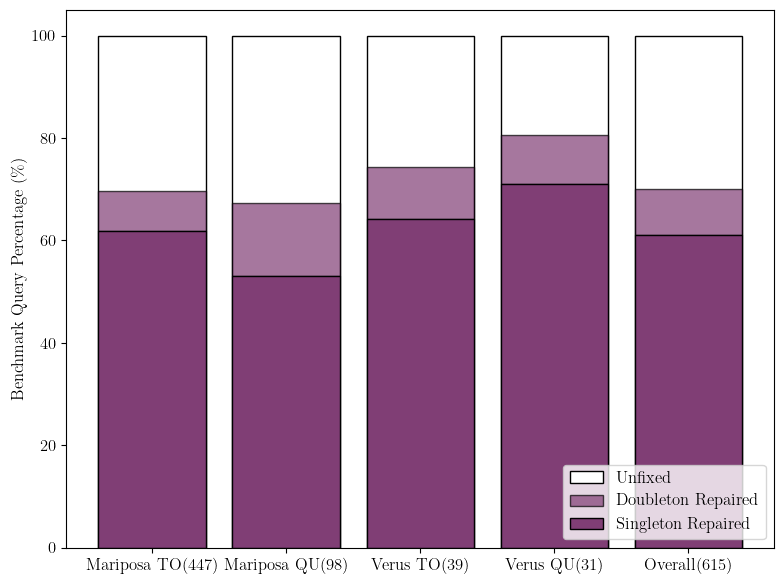

In [ ]:
# Stacked bar plot
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.4

ax.bar(
    benchmarks,
    100,
    bottom=0,
    label="Unfixed",
    color="white",
    edgecolor="black",
    linewidth=1,
)

ax.bar(
    benchmarks,
    r2,
    bottom=r1,
    label="Doubleton Repaired",
    color="#803E75",
    alpha=0.7,
    edgecolor="black",
    linewidth=1,
)

# ax.bar(categories, no_proof, label="1-no-proof", color="red")
ax.bar(
    benchmarks,
    r1,
    label="Singleton Repaired",
    color="#803E75",
    alpha=1,
    edgecolor="black",
    linewidth=1,
)

# Labels and legend
ax.set_ylabel("Benchmark Query Percentage (\%)")
# ax.set_title("Breakdown of Proof Failures by Category with Total Counts")
ax.legend(loc="lower right")

# Show plot
plt.xticks()
plt.tight_layout()
plt.savefig("fig/debugger/fixable.pdf", dpi=300)

In [ ]:
mariposa_fixable = (np.sum(fixable_1[:2] + fixable_2[:2])) / np.sum(bench_query_count[:2])
verus_fixable = (np.sum(fixable_1[2:] + fixable_2[2:])) / np.sum(bench_query_count[2:])
print(mariposa_fixable)
print(verus_fixable)
print((fixable_2) / bench_query_count)